## Linear Regression
The goal of linear regression is to model the relationship between
a single feature or multiple features(explanatory variables x) and a continuous valued response (target
variable y). The equation of a linear model with one explanatory variable is defined
as follows:

$y=C_{0}+C_{1}X$


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Creating a simple data for understanding line of best fit
# This data shows how the weight of a person changes with total hours at gym
SampleData=[[1,95],
            [2,85],
            [2.5,83],
            [3,81],
            [3.5,80],
            [4,78],
           ]
# Creating a data frome using above array of data
GymData=pd.DataFrame(data=SampleData,columns=['Hours','Weight'])
GymData

,Hours,Weight
0,1.0,95
1,2.0,85
2,2.5,83
3,3.0,81
4,3.5,80
5,4.0,78


In [3]:
# Understanding the correlation between weight and exercise
GymData.corr()

,Hours,Weight
Hours,1.00000,-0.95304
Weight,-0.95304,1.00000


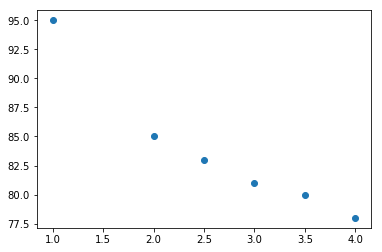

In [4]:
%matplotlib inline
import matplotlib.pyplot as PlotObject

# Visualizing the relationship using scatter plot
PlotObject.scatter(x=GymData['Hours'] , y=GymData['Weight'])

In [5]:
# Importing LinearRegression function from sklearn
from sklearn.linear_model import LinearRegression

In [6]:
X=GymData[['Hours']].values
y=GymData[['Weight']].values

In [7]:
# X is a numpy array with the values of Hours, which is our predictor
X

array([[ 1. ],
       [ 2. ],
       [ 2.5],
       [ 3. ],
       [ 3.5],
       [ 4. ]])

In [8]:
# y is a numpy array with the values of Weight, which is our Target Variable
y

array([[95],
       [85],
       [83],
       [81],
       [80],
       [78]], dtype=int64)

In [9]:
# Creating the Simple linear regression model
slr=LinearRegression()
WeightRegModel=slr.fit(X,y)

In [10]:
print('The value of slope is: ',WeightRegModel.coef_)
print('The value of Intercept is: ',WeightRegModel.intercept_)

The value of slope is:  [[-5.34285714]]
The value of Intercept is:  [ 97.91428571]


### The equation for line of best fit
Weight= -5.3 * Hours + 97

In [11]:
# Making predictions
PredictedWeight=WeightRegModel.predict(X)
GymData['PredictedWeight']=PredictedWeight
GymData

,Hours,Weight,PredictedWeight
0,1.0,95,92.571429
1,2.0,85,87.228571
2,2.5,83,84.557143
3,3.0,81,81.885714
4,3.5,80,79.214286
5,4.0,78,76.542857


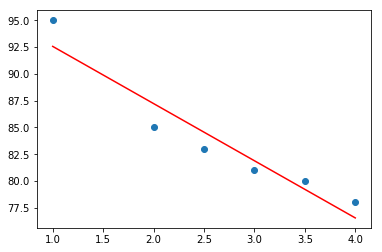

In [12]:
# Visualizing the line of best fit
PlotObject.scatter(x=GymData['Hours'] , y=GymData['Weight'])
PlotObject.plot(GymData['Hours'] , GymData['PredictedWeight'], color='red')

## Boston Housing Price Prediction 
Before we implement our first linear regression model, we will introduce a new
dataset, the Housing Dataset, which contains information about houses in the
suburbs of Boston collected by D. Harrison and D.L. Rubinfeld in 1978.

#### Problem Statement: 
Predict the Median value of owner-occupied homes based on all other variables

Source: [https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
</pre>

In [13]:
import pandas as pd
# Reading Boston housing data from csv file
BostonHousingData = pd.read_csv('C:/Users/fhashmi/Data Science using Python/Python Datasets/Regression Datasets/BostonHousingData.csv')
BostonHousingData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Exploring data distribution using histogram 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000001A7162CF8>]], dtype=object)

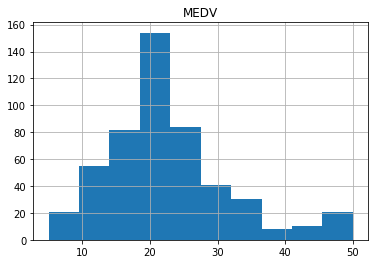

In [14]:
# Exploring each columns distribution using histogram
% matplotlib inline
BostonHousingData.hist('MEDV')

In [15]:
#Printing column names
BostonHousingData.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### Visualizing the important characteristics of a dataset

The plot has been saved at dir:  C:\Users\fhashmi\Data Science using Python


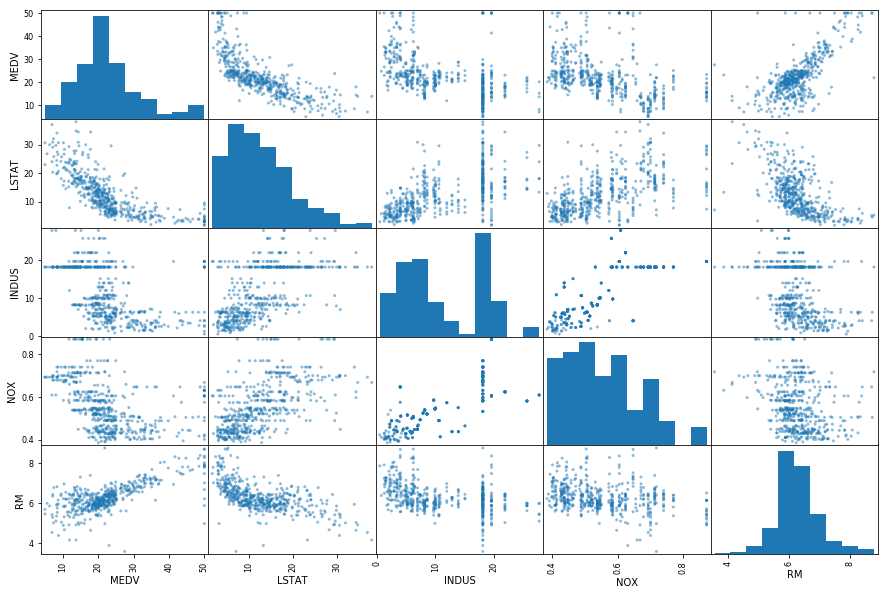

In [16]:
import os
import matplotlib.pyplot as plotObject
%matplotlib inline

columnsForAnalysis = ['MEDV','LSTAT', 'INDUS', 'NOX', 'RM']
pd.plotting.scatter_matrix(BostonHousingData[columnsForAnalysis], figsize=(15, 10) , marker='.')

# Saving the plot in the current working directory
plotObject.savefig('BostonHousingScatterPlot.png')
print('The plot has been saved at dir: ',os.getcwd())

## Correlation Matrix
The correlation matrix is a square matrix that contains the Pearson product-moment
correlation coefficients (often abbreviated as Pearson's r), which measure the linear
dependence between pairs of features. The correlation coefficients are bounded
to the range -1 and 1. Two features have a perfect positive correlation if $r=1$, no
correlation if $r=0$ and a perfect negative correlation if $r=-1$ respectively. As
mentioned previously, Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator):  




\begin{equation}
r=\frac{\sum_{i=1}^n[(X^{(i)}-\mu_{x}) (y^{(i)}-\mu_{y})]}{\sqrt{\sum_{i=1}^n(X^{(i)}-\mu_{x})^2}\sqrt{\sum_{i=1}^n(y^{(i)}-\mu_{y})^2}}  = \frac{\sigma_{xy}}{\sigma_{x}\sigma{y}}
\end{equation}

* This value can be calculated only between two numeric values
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [17]:
# Generating correlation matrix for each variable vs each other variable
# To observe how each column is correlated with MEDV, look at the last line.
BostonHousingData.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Estimating the coefficients of a regression model via scikit-learn
Scikit-learn (formerly scikits.learn) is a machine learning library for the Python programming language.
It features various classification, regression and clustering algorithms.

## Simple Linear Regression
when we have one Target and ONLY one predictor its called simple linear regression
#### Choose any one variable which has highest correlation with MEDV ( Target Varibale )

In [18]:
#importing Linear Regression model object from sklearn
from sklearn.linear_model import LinearRegression

In [19]:
# taking MEDV as target variable
# choosing RM variable as predictor because it is having maximum magnitude of correlation with MEDV
X = BostonHousingData[['LSTAT']].values
y = BostonHousingData[['MEDV']].values

In [20]:
#creating an instance for simple linear regression
slr = LinearRegression()

# Creating the model using one Predictor and target variable
BostonRegModel=slr.fit(X, y)

In [21]:
print('The value of slope is: ',BostonRegModel.coef_)
print('The value of Intercept is: ',BostonRegModel.intercept_)

The value of slope is:  [[-0.95004935]]
The value of Intercept is:  [ 34.55384088]


### Using above slope and intercept, Equation of our Simple Linear regression model becomes
MEDV = -0.95 * LSTAT + 34

In [22]:
# Predict the values of MEDV using above SLR model
yhat = BostonRegModel.predict(X)
BostonHousingData['PredictedMEDV']=yhat
BostonHousingData.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PredictedMEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,29.822595
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.870390
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.725142
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.760696
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,29.490078
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,29.604084
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,22.744727
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,16.360396
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,6.118864
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,18.307997


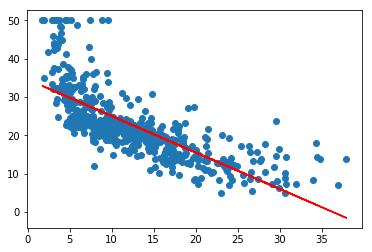

In [23]:
# Visualizing the line of best fit
PlotObject.scatter(x=BostonHousingData['LSTAT'] , y=BostonHousingData['MEDV'])
PlotObject.plot(BostonHousingData['LSTAT'] , BostonHousingData['PredictedMEDV'], color='red')

## Multiple Linear Regression
When we have one Target and MULTIPLE predictors its called multiple linear regression

In [24]:
# Choosing multiple variables based on the highest magnitude of correlation with the target variable(MEDV)
SelectedColumsForMLR=['RM','LSTAT','PTRATIO','PTRATIO']
TargetVariable=['MEDV']
X = BostonHousingData[SelectedColumsForMLR].values
y = BostonHousingData[TargetVariable].values

In [25]:
# splitting the data into training and testing.
# we will create the model on training data
# test the model created on testing data
from sklearn.model_selection import train_test_split

In [26]:
# creating Training and Tesing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [27]:
#creating an instance for multiple linear regression
mlr = LinearRegression()

# Creating the model using Training data of MULTIPLE Predictors and target variable
BostonRegModel=mlr.fit(X_train, y_train)

## Evaluating the performance of linear regression models

To evaluate the performace of the model we compute minimum possible Sum of Squared Errors (SSE) which is the mean of square of differences of actual target variable and the predicted value. Finally, to calculate the accuracy of the model, (100-MAPE) is calculated. MAPE is Mean Absolute Percent Error (on an average how much error the predictive model is committing for each prediction)



\begin{equation}
  SS_{res}=\sum_{i=1}^{n} \left({y_{i}-f(X_{i})}\right)^{2} 
\end{equation}




### Evaluating Goodness of fit based on Training Data

In [28]:
# Evaluating goodness of fit
# Compute Variance explained by model(R2)
# Note that the R-Squared has increased, because we are now providing more columns to the model
import numpy as np
y=y_train

# Predicting the medv values for Training data
yhat = BostonRegModel.predict(X_train)

# Computing variance explained by the model and total variance in the data
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)

# Computing R2 Value
r_squared = 1 - (float(SS_Residual))/SS_Total

# Computing Adjusted R2 Value
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('R-Squared: ', r_squared)
print('Adjusted R-Squared: ', adjusted_r_squared)

R-Squared:  [ 0.69437805]
Adjusted R-Squared:  [ 0.69087522]


### Evaluating Model Accuracy based on Testing data

In [29]:
# Predicting the medv values for testing data
yhatTesting = BostonRegModel.predict(X_test)

# Creating a DataFrame of Boston Testing data
BostonHousingTestingData=pd.DataFrame(X_test, columns=SelectedColumsForMLR)
BostonHousingTestingData['MEDV']=y_test
BostonHousingTestingData.head()

,RM,LSTAT,PTRATIO,PTRATIO,MEDV
0,7.313,13.44,20.2,20.2,15.0
1,6.516,6.36,17.9,17.9,23.1
2,6.618,7.60,17.4,17.4,30.1
3,6.593,9.67,21.0,21.0,22.4
4,6.230,12.93,18.2,18.2,20.1


In [30]:
import copy
# Now if we change anything in BostonHousingDataCopy, it will NOT affect the values in BostonHousingTestingData
BostonHousingTestingDataCopy=copy.deepcopy(BostonHousingTestingData)

In [31]:
BostonHousingTestingDataCopy['PredictedMEDV']=yhatTesting.round(2)
BostonHousingTestingDataCopy.head()

,RM,LSTAT,PTRATIO,PTRATIO,MEDV,PredictedMEDV
0,7.313,13.44,20.2,20.2,15.0,24.65
1,6.516,6.36,17.9,17.9,23.1,27.61
2,6.618,7.60,17.4,17.4,30.1,27.83
3,6.593,9.67,21.0,21.0,22.4,22.90
4,6.230,12.93,18.2,18.2,20.1,22.20


In [32]:
# Calculating the Absolute Percentage Error committed in each prediction
BostonHousingTestingDataCopy['APE']=100 * (abs(BostonHousingTestingDataCopy['MEDV'] - BostonHousingTestingDataCopy['PredictedMEDV'])/BostonHousingTestingDataCopy['MEDV'])
BostonHousingTestingDataCopy.head()

,RM,LSTAT,PTRATIO,PTRATIO,MEDV,PredictedMEDV,APE
0,7.313,13.44,20.2,20.2,15.0,24.65,64.333333
1,6.516,6.36,17.9,17.9,23.1,27.61,19.523810
2,6.618,7.60,17.4,17.4,30.1,27.83,7.541528
3,6.593,9.67,21.0,21.0,22.4,22.90,2.232143
4,6.230,12.93,18.2,18.2,20.1,22.20,10.447761


In [36]:
# Final accuracy of the model
print('Testing data Mean Absolute Percent Error(MAPE): ',round(np.mean(BostonHousingTestingDataCopy['APE'])), '%')
print('Testing data Average Accuracy of the model: ',100 - round(np.mean(BostonHousingTestingDataCopy['APE'])), '%')

Testing data Mean Absolute Percent Error(MAPE):  20 %
Testing data Average Accuracy of the model:  80 %


## Effect of Standadization

In [34]:
# find out the Accuracy for test and train data after standardization of Predictor Variables

## Effect of Normalization

In [35]:
# find the Accuracy for test and train data after Normalization of Predictor Variables

## Home Work
1. Find out which set of predictors are providing highest Accuracy for BostonHousingData
2. Perform Multiple Linear Regression on DiamondPricesDataCleaned to find which set of predictors are providing highest Accuracy